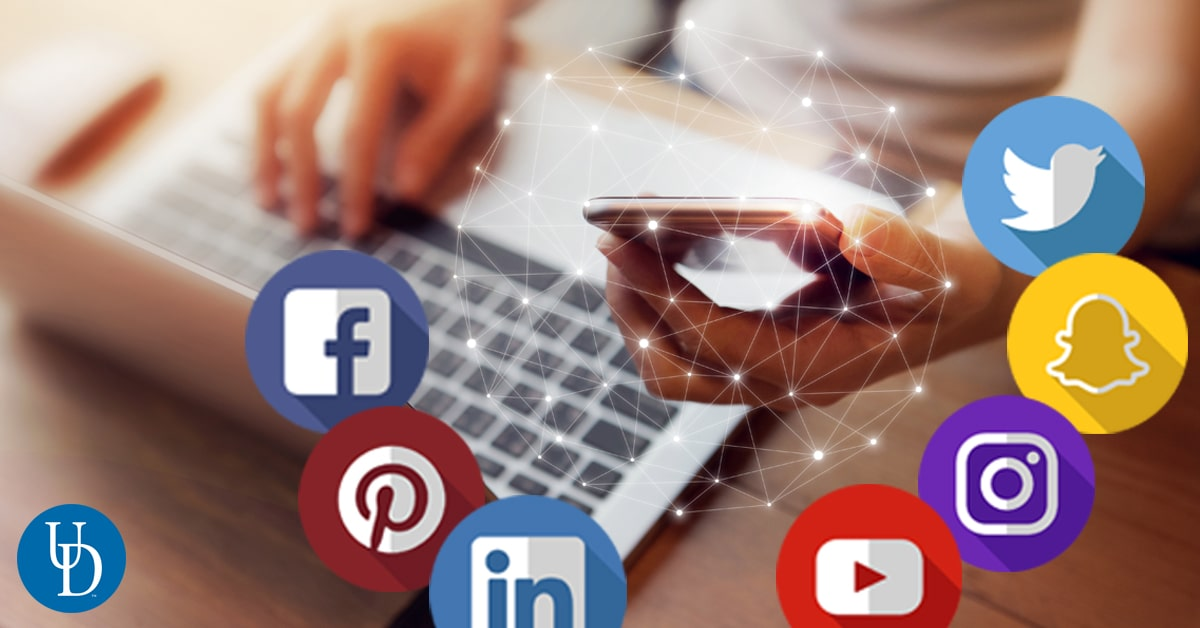

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        Description
   </p>
</div>


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       The Social Media Sentiments Analysis Dataset captures a vibrant tapestry of emotions, trends, and interactions across various social media platforms. This dataset provides a snapshot of user-generated content, encompassing text, timestamps, hashtags, countries, likes, and retweets. Each entry unveils unique stories—moments of surprise, excitement, admiration, thrill, contentment, and more—shared by individuals worldwide.
   </p>
</div>


****Columns :****

* Text: Text content of the post.
* Sentiment: Sentiment of the post (positive, negative, or neutral).
* Timestamp: Date and time of the post.
* User: Username of the poster.
* Platform: Social media platform where the post was made (Twitter, Instagram, Facebook).
* Hashtags: Hashtags used in the post.
* Retweets: Number of retweets for the post.
* Likes: Number of likes for the post.
* Country: Country of origin for the poster.
* Year: Year in which the post was made.
* Month: Month in which the post was made.
* Day: Day of the month on which the post was made.
* Hour: Hour of the day at which the post was made.

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        1. Import Libraries
   </p>
</div>


In [ ]:
pip install twython 

In [ ]:
pip install vaderSentiment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud




nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        3. Load Data
   </p>
</div>


In [ ]:
df = pd.read_csv("/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv")

In [ ]:
df.head()

In [ ]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

In [ ]:
df.duplicated().sum()

In [ ]:
df.columns

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        3. Feature Enginering
   </p>
</div>


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Drop Columns
   </p>
</div>


In [ ]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour','Sentiment'])

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Platform
   </p>
</div>


In [ ]:
df['Platform'].value_counts()

In [ ]:
df['Platform'] = df['Platform'].str.strip()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Country
   </p>
</div>


In [ ]:
df['Country'].value_counts()

In [ ]:
df['Country'] = df['Country'].str.strip()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Timestamp
   </p>
</div>


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Month
   </p>
</div>


In [ ]:
month_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Text
   </p>
</div>


In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Unique Columns 
   </p>
</div>


In [ ]:
specified_columns = ['Platform','Country', 'Year','Month','Day_of_Week']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')  

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        4. E D A
   </p>
</div>


In [ ]:
df1 = df.copy()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
       4.1 Sentiment Analysis 
   </p>
</div>


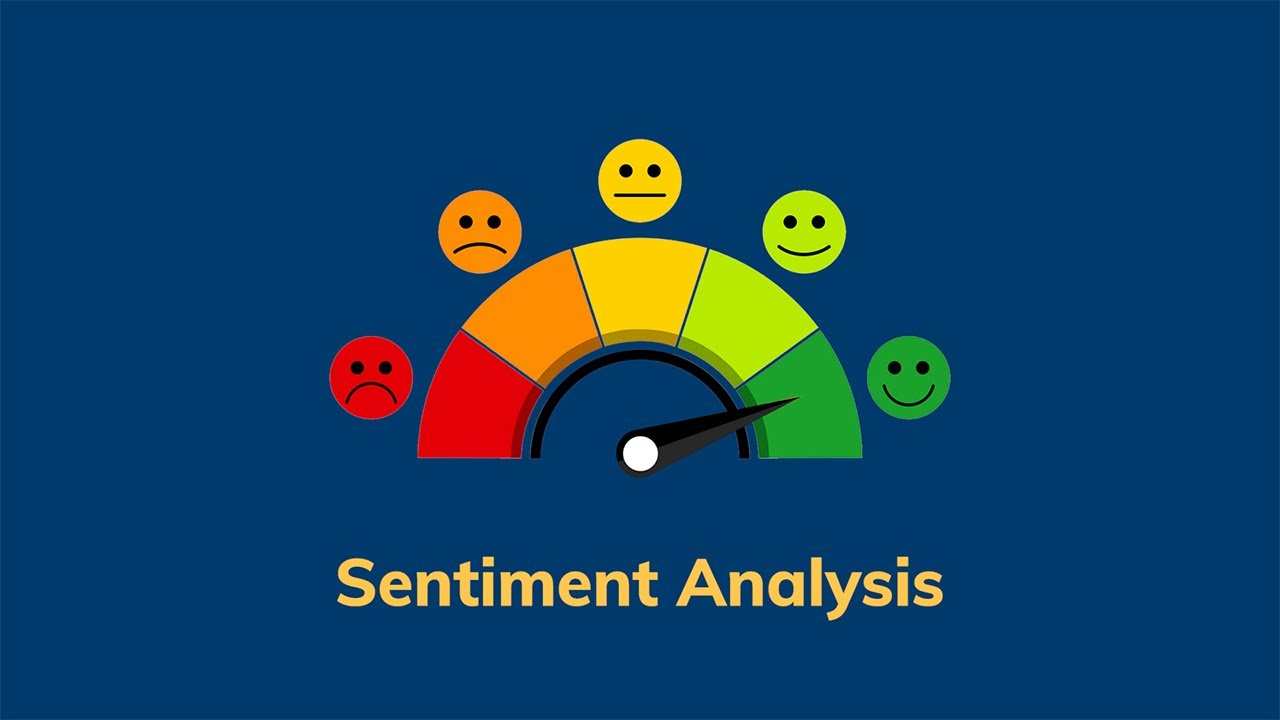

In [ ]:
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

In [ ]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)  

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Year
   </p>
</div>


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Month
   </p>
</div>


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Day Of Weeek
   </p>
</div>


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Platform 
   </p>
</div>


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Country
   </p>
</div>


In [ ]:
plt.figure(figsize=(12, 6))

top_10_countries = df1['Country'].value_counts().head(10).index

df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
       4.2 Common Words
   </p>
</div>


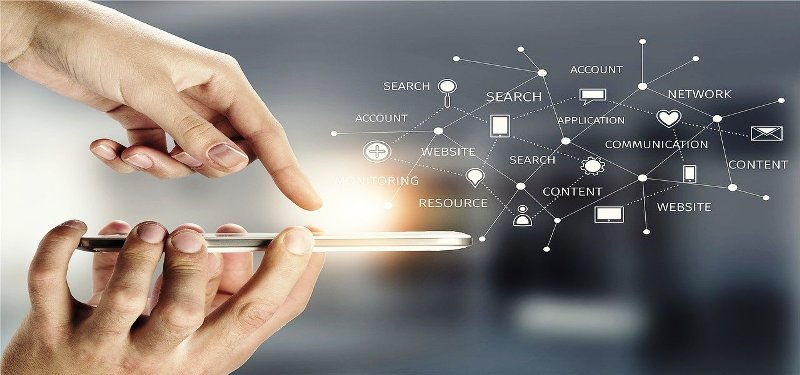

In [ ]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')


In [ ]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()


In [ ]:
Positive_sent = df1[df1['Sentiment'] == 'positive']
Negative_sent = df1[df1['Sentiment'] == 'negative']
Neutral_sent = df1[df1['Sentiment'] == 'neutral']


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Positive Common Words
   </p>
</div>


In [ ]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')


In [ ]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Neutral Common Words
   </p>
</div>


In [ ]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')


In [ ]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
         Negative Common Words
   </p>
</div>


In [ ]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')


In [ ]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        5. Data Preparation
   </p>
</div>


In [ ]:
df2 = df1.copy()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        5.1 Split Data
   </p>
</div>


In [ ]:
X = df2['Clean_Text'].values
y = df2['Sentiment'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        6. Modeling
   </p>
</div>


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Passive Aggressive Classifier
   </p>
</div>


In [ ]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

In [ ]:
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [ ]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Logistic Classifier
   </p>
</div>


In [ ]:
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

In [ ]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
     Random Fores Classifier
   </p>
</div>


In [ ]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [ ]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
     SVM Classifier
   </p>
</div>


In [ ]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [ ]:
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
     Multinomial NB
   </p>
</div>


In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

In [ ]:
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Best Modeling : Passive Aggressive Classifier
   </p>
</div>



<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Hyperparameters
   </p>
</div>



In [ ]:
param_dist = {
    'C': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'verbose': [0, 1],
}

In [ ]:
pac_classifier = PassiveAggressiveClassifier(random_state=42)

randomized_search = RandomizedSearchCV(pac_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

In [ ]:
best_params_randomized = randomized_search.best_params_
best_params_randomized

In [ ]:
best_pac_classifier_randomized = PassiveAggressiveClassifier(random_state=42, **best_params_randomized)
best_pac_classifier_randomized.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_best_pac_randomized = best_pac_classifier_randomized.predict(X_test_tfidf)

In [ ]:
accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

In [ ]:
print("Best PassiveAggressiveClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_pac_randomized}")
print("Classification Report:\n", classification_rep_best_pac_randomized)


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greys', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        7. Finish
   </p>
</div>


<div style="background-color: #FFD700; color: #000000; padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-weight: bold; margin: 0;">
       If you found this notebook helpful or enjoyable, I'd greatly appreciate any upvotes! 🚀
    </p>
</div>


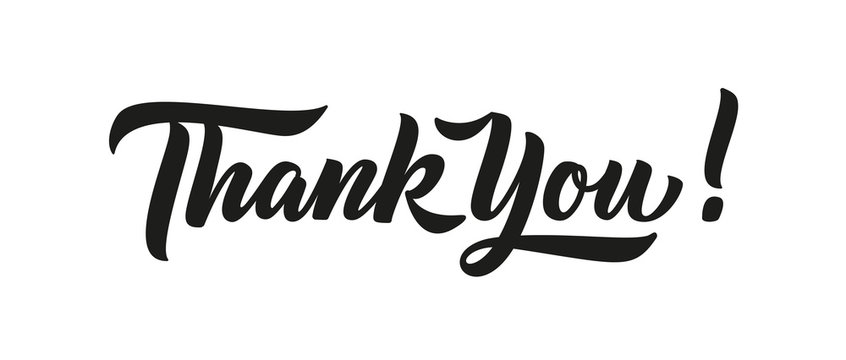